# 1. Data Import and Preparation

In [1]:
import pandas as pd # collection of functions for data processing and analysis modeled after R dataframes with SQL like features
import numpy as np  # foundational package for scientific computing
import re           # Regular expression operations
import matplotlib.pyplot as plt # Collection of functions for scientific and publication-ready visualization
%matplotlib inline
import os           # Get filepath from system local drive

import plotly.offline as py     # Open source library for composing, editing, and sharing interactive data visualization 
from matplotlib import pyplot as pp
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.tools as tls
import seaborn as sns  # Visualization library based on matplotlib, provides interface for drawing attractive statistical graphics

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import dataset
dataset_path = os.path.join('C:' + os.sep, 'Users' + os.sep, 'user' + os.sep, 'Documents' + os.sep,'EDA' + os.sep, 'charles_schwab_(SCHW).csv')
print(dataset_path)

C:\Users\user\Documents\EDA\charles_schwab_(SCHW).csv


In [3]:
df = pd.read_csv(dataset_path)
df.head(2)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,12-07-2017,3,2,5,4,2,6,5,1,1,...,8,0,1,2,1,3,10,Less than 20,Male,668.4
1,12-07-2017,5,2,4,5,7,5,3,3,1,...,7,0,1,2,3,5,3,21 to 35,Female,682.4


In [5]:
df['AGE']=df['AGE'].replace('Less than 20', '20 or less')
df.head(2)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,12-07-2017,3,2,5,4,2,6,5,1,1,...,8,0,1,2,1,3,10,20 or less,Male,668.4
1,12-07-2017,5,2,4,5,7,5,3,3,1,...,7,0,1,2,3,5,3,21 to 35,Female,682.4


In [6]:
colomn = df.columns
colomn

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

### Descriptive Summary

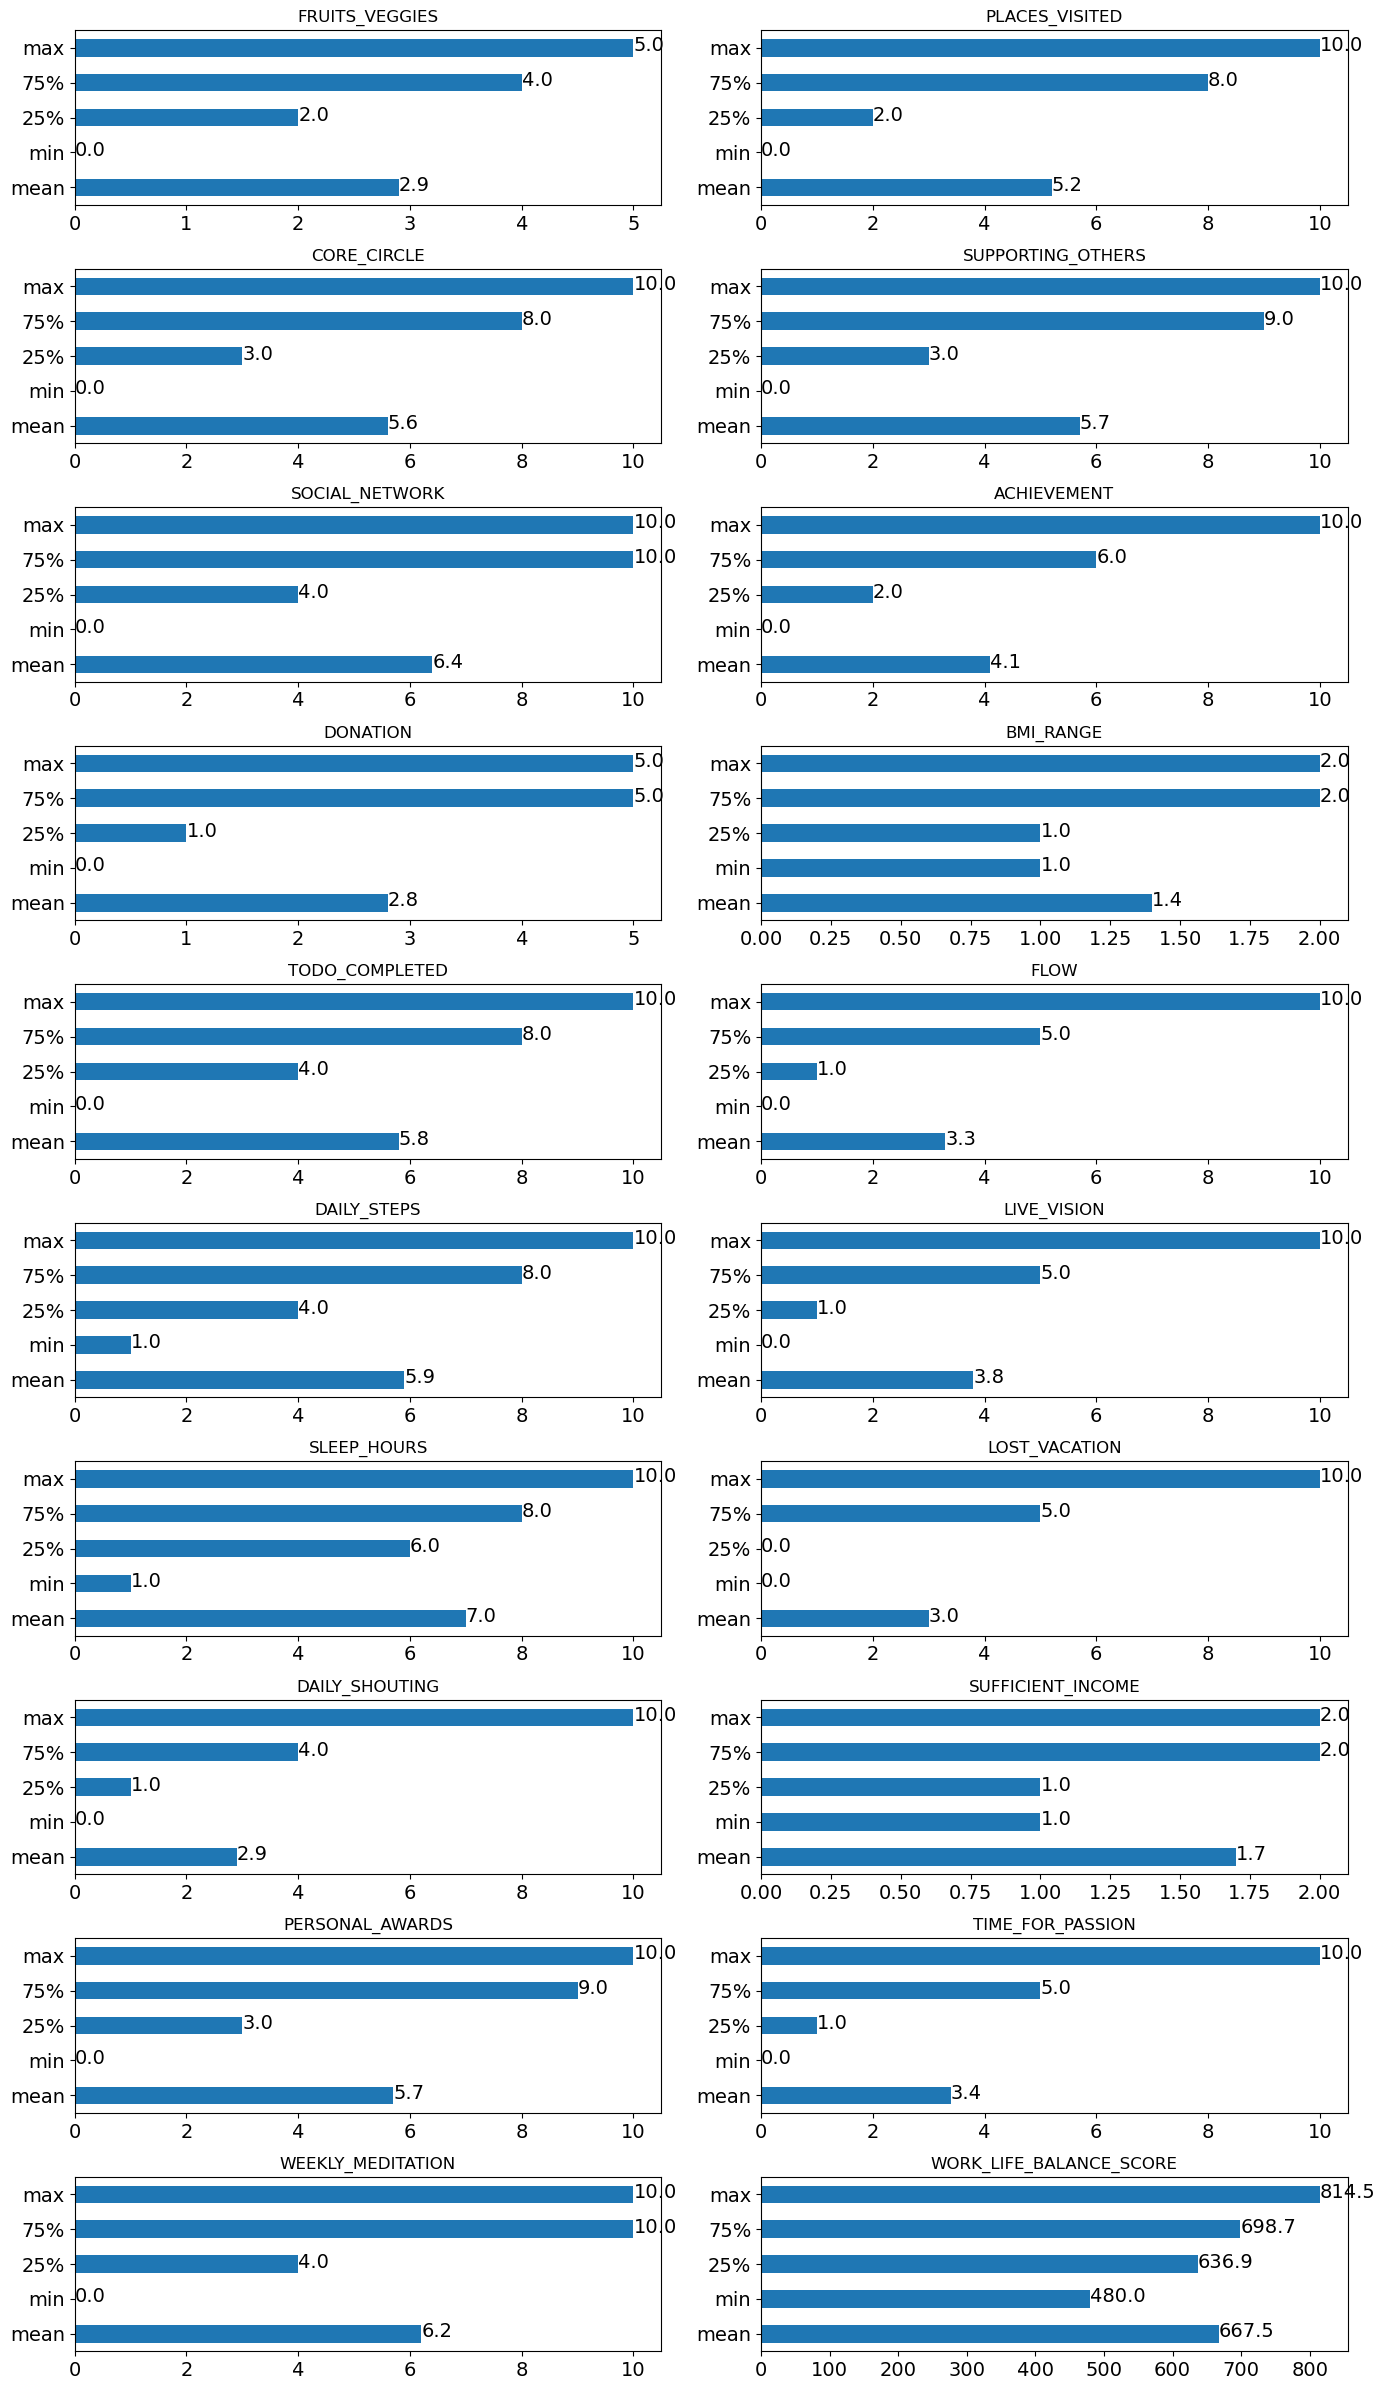

In [7]:
def descriptive(df):
    desc=df.describe().round(1).drop({'count', 'std', '50%'}, axis=0)
    i=-0.1
    j=0
    Row = int(round(len(desc.columns.tolist())/2+0.1))
    f,ax = plt.subplots(Row,2, figsize=(28,18))
    for name in desc.columns.tolist():
        desc[name].plot(kind='barh', figsize=(14,24), title=name, ax=ax[round(i), j], fontsize=14)
        for k, v in enumerate(desc[name].tolist()):
            ax[round(i), j].text(v, k-0.1, str(v), color='black', size = 14)
        i +=0.5
        if j==0: j=1
        else: j=0
    f.tight_layout()
descriptive(df)

In [8]:
df['MONTH'] = pd.DatetimeIndex(df['Timestamp']).month
df.head(3)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE,MONTH
0,12-07-2017,3,2,5,4,2,6,5,1,1,...,0,1,2,1,3,10,20 or less,Male,668.4,12
1,12-07-2017,5,2,4,5,7,5,3,3,1,...,0,1,2,3,5,3,21 to 35,Female,682.4,12
2,12-07-2017,5,1,5,7,10,3,8,5,1,...,0,0,2,8,7,8,51 or more,Male,759.7,12


# 2. Exploratory Data Analysis (EDA)

## 2.1 Healthy body

In [9]:
df2 = df.pivot_table(values='BMI_RANGE', index=['AGE'], columns=['GENDER'], )
df2.head()

GENDER,Female,Male
AGE,,
20 or less,1.248380,1.212766
21 to 35,1.351424,1.344454
36 to 50,1.503222,1.544910
51 or more,1.525084,1.529946


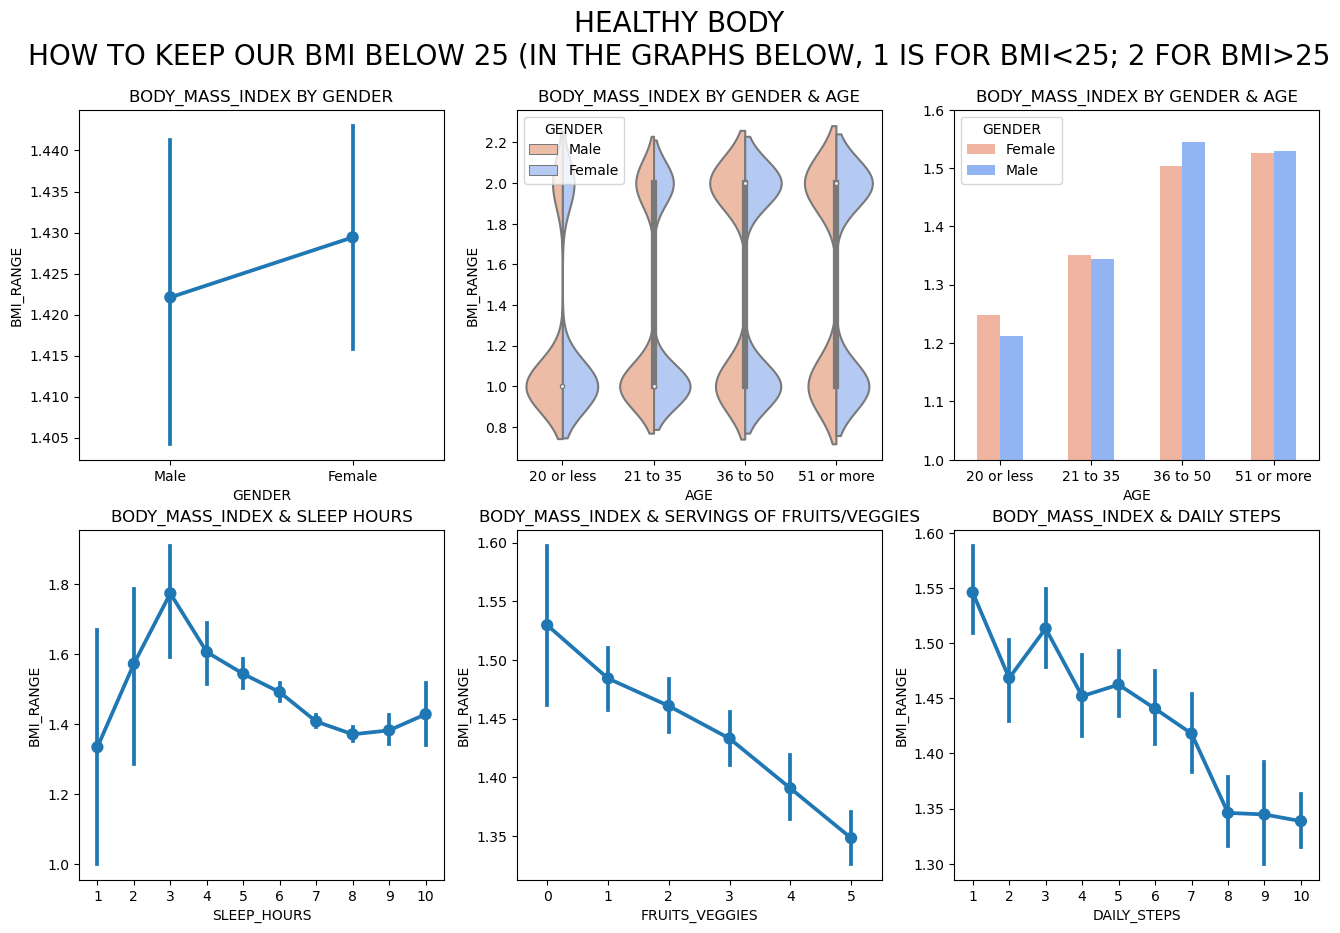

In [10]:
# HEALTHY BODY
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('BODY_MASS_INDEX BY GENDER')
ax[0,1].set_title('BODY_MASS_INDEX BY GENDER & AGE')
ax[0,2].set_title('BODY_MASS_INDEX BY GENDER & AGE')
ax[1,0].set_title('BODY_MASS_INDEX & SLEEP HOURS')
ax[1,1].set_title('BODY_MASS_INDEX & SERVINGS OF FRUITS/VEGGIES')
ax[1,2].set_title('BODY_MASS_INDEX & DAILY STEPS')

sns.pointplot(x = 'GENDER', y = 'BMI_RANGE',  data=df, ax = ax[0,0])
sns.violinplot(x = 'AGE', y = 'BMI_RANGE', hue = 'GENDER', data = df, palette='coolwarm_r',
               order=['20 or less', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,1])

ax[0,2].set_ylim([1, 1.6])
df2.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,2])
ax[0,2].tick_params(axis='x', rotation=0)

sns.pointplot(x = 'SLEEP_HOURS', y = 'BMI_RANGE',  data=df, ax = ax[1,0])
sns.pointplot(x = 'FRUITS_VEGGIES', y = 'BMI_RANGE', data=df, ax = ax[1,1])
sns.pointplot(x = 'DAILY_STEPS', y = 'BMI_RANGE',  data=df, ax = ax[1,2])

f.suptitle('HEALTHY BODY\nHOW TO KEEP OUR BMI BELOW 25 (IN THE GRAPHS BELOW, 1 IS FOR BMI<25; 2 FOR BMI>25', fontsize=20)
plt.show()

### Observations

<ul style="list-style-type:square">
  <li>In this comprehensive study, body mass index (BMI) data were methodically categorized, with values of 1 for BMI less than 25 and 2 for BMI more than 25. Notably, BMI was shown to be significantly related to daily steps and fruit and vegetable consumption, revealing unanticipated unfavorable correlations. When comparing those who walk 5,000 steps per day to those who walk less than 1,000 steps, and people who eat 5 servings of fruits and vegetables to those who eat less than 1 serving, both factors had a 15% effect on BMI. This finding underscores the vital importance of physical activity and a nutritious diet in achieving a lower BMI.</li>
  <li>In addition, the study discovered noteworthy variances in BMI averages between age groups and gender. While BMI values for men and women converged in the age ranges "less than 20" and "51 or more," intriguing disparities were observed in the age ranges 36 to 50 and 50 and more as age proceeds.</li>
  <li>A striking trend observed in the 36 to 50 age range, demonstrating that women had higher BMIs than their male counterparts. This discovery calls for more research into the lifestyle, food habits, and socioeconomic variables that influence BMI in this specific community.</li>
   <li>In the 21 to 35 age group, however, the study revealed a reversal of the norm, with males having higher BMIs than women. This shift in BMI dynamics across genders within this age group necessitates a thorough evaluation of potential contributing causes, which include lifestyle choices, metabolic changes, and socio-cultural impacts.</li>
   <li>Women are far more likely than males to value having a healthy relationship with their family (84 percent vs. 74 percent). While fewer women feel they are excelling in this area, they outnumber males (67 percent vs. 53 percent).</li>
   <li>Seasonal Affective Disorder (SAD syndrome) affects women four times more than males, and its prevalence increases as one moves away from the Equator. Tromso, a city in Norway 200 miles north of the Arctic Circle, for example, has over 50 days during the winter when the sun does not shine. This is known as morketi den (murky time), and according to one psychiatrist, "the entire city slows down, people's concentration and work capacity are reduced, and they are always tired." "Depression is on the rise, particularly among women." Accidents are on the rise, as are sales of sleeping medications, tranquilizers, and "pep" tablets. Soldag (Sunday) marks the return of the sun after a seven-week hiatus.</li>
</ul>

# 2.2 Healthy mind


In [12]:
df['DAILY_STRESS']=pd.to_numeric(df['DAILY_STRESS'],errors = 'coerce')

In [13]:
df3 = df.pivot_table(values='DAILY_STRESS', index=['AGE'], columns=['GENDER'], )
df3.head()

GENDER,Female,Male
AGE,,
20 or less,3.019438,2.495441
21 to 35,2.978506,2.566778
36 to 50,2.947165,2.788024
51 or more,2.724080,2.477314


In [14]:
df3 = df.pivot_table(values='DAILY_STRESS', index=['AGE'], columns=['GENDER'], )
df3.head()

GENDER,Female,Male
AGE,,
20 or less,3.019438,2.495441
21 to 35,2.978506,2.566778
36 to 50,2.947165,2.788024
51 or more,2.724080,2.477314


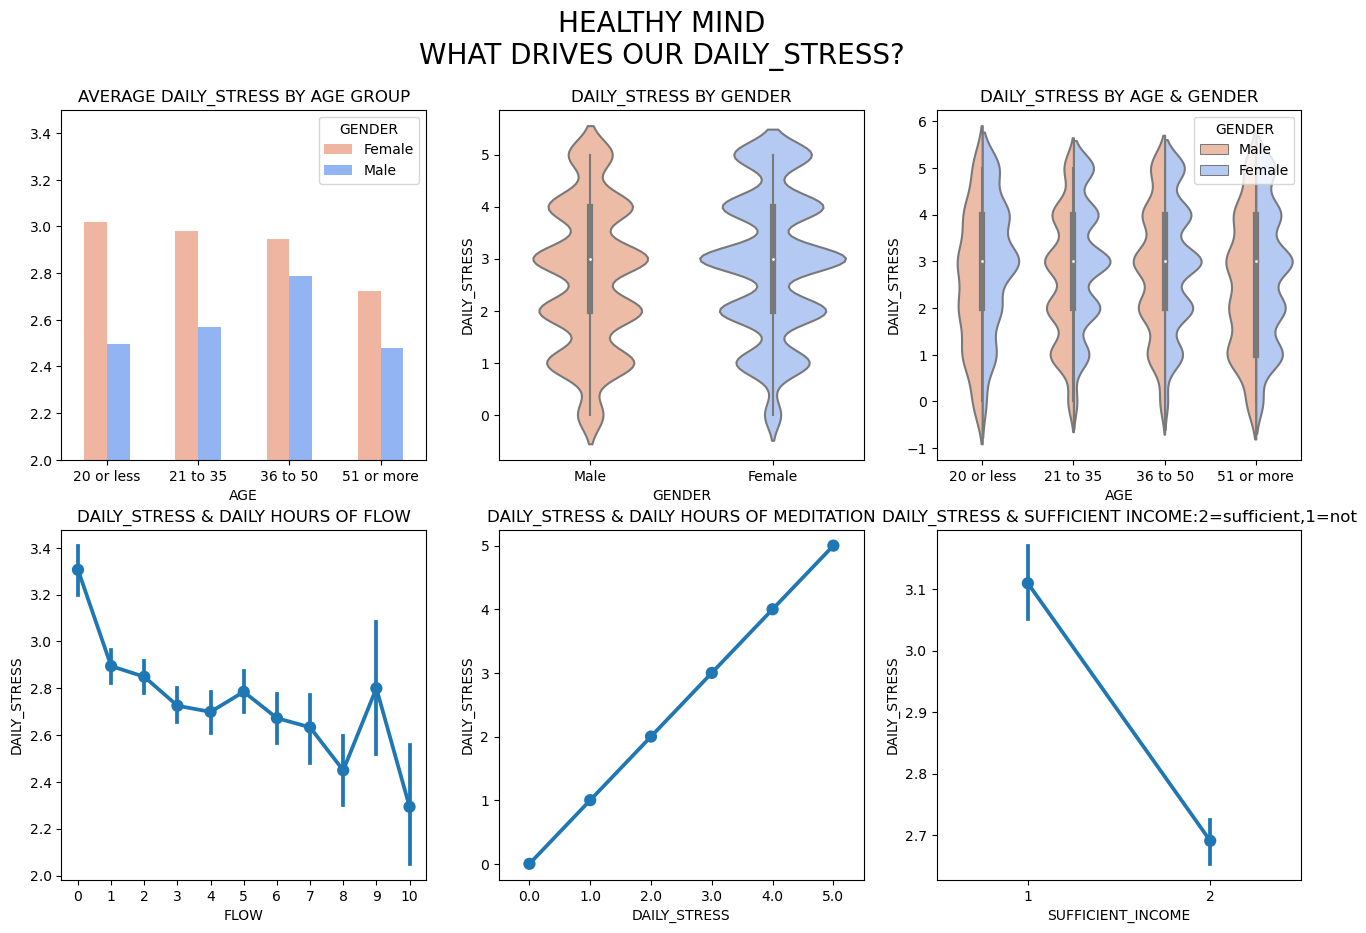

In [22]:
# HEALTHY MIND
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('AVERAGE DAILY_STRESS BY AGE GROUP')
ax[0,1].set_title('DAILY_STRESS BY GENDER')
ax[0,2].set_title('DAILY_STRESS BY AGE & GENDER')
ax[1,0].set_title('DAILY_STRESS & DAILY HOURS OF FLOW')
ax[1,1].set_title('DAILY_STRESS & DAILY HOURS OF MEDITATION')
ax[1,2].set_title('DAILY_STRESS & SUFFICIENT INCOME:2=sufficient,1=not')

ax[0,0].set_ylim([2, 3.5])
df3.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.violinplot(x= 'GENDER',y='DAILY_STRESS', palette='coolwarm_r', data=df, ax = ax[0,1])
sns.violinplot(x = 'AGE', y = 'DAILY_STRESS', hue = 'GENDER', palette='coolwarm_r', data = df,
               order=['20 or less', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,2])
sns.pointplot(x = 'FLOW', y = 'DAILY_STRESS',  data=df, ax = ax[1,0])
sns.pointplot(x = 'DAILY_STRESS', y = 'DAILY_STRESS', data=df, ax = ax[1,1])
sns.pointplot(x = 'SUFFICIENT_INCOME', y = 'DAILY_STRESS',  data=df, ax = ax[1,2])

f.suptitle('HEALTHY MIND\nWHAT DRIVES OUR DAILY_STRESS?', fontsize=20)
plt.show()

### Observations

<ul style="list-style-type:square">
     <li>Men have the highest levels of overall stress while they are younger, and it progressively diminishes as they age, but women have the opposite effect. Despite this decrease, women's stress levels continue to outnumber those of males across all age groups.</li>
     <li>Men are more likely than women to report that their stress levels are rising, while having comparable average stress levels. They are also considerably more prone to have physical and mental stress symptoms than men. When comparing women, it appears that married and single women feel stress in different ways. For males, the mental health curve appears to level out over time.</li>
     <li>The American Psychological Association reached a similar result:
         <ol>
             <li>Women are more invested in personal connections than males and suffer more when such ties are disturbed. As more married women and housewives enter the labor field, many find it challenging to balance employment and home duties, such as caring for an aging relative. Depression in middle-aged women has more than quadrupled in 40 years as a result of these pressures, according to a large European research including over 30 nations and a combined population of 514 million people. Women between the ages of 25 and 40 were three to four times as likely than males to develop depression.</li>
             <li>Almost half of the women (49%) reported an increase in stress in the previous five years, compared to four out of ten (39%) males following marriage.</li>
             <li>Women outlive males, and extreme old age is frequently linked with loss, loneliness, poor physical condition, and other risk factors for depression.</li>
         </ol>  
    </li>
    <li><h2><span class="ez-toc-section" id="Causes_of_Stress_in_Men"></span>Causes of Stress in Men<span class="ez-toc-section-end"></span></h2>
<ul>
<li style="font-weight: 400;" aria-level="1"><b>Finances:</b> Debt, paying bills, and not earning enough money.</li>
<li style="font-weight: 400;" aria-level="1"><b>Work:</b> Long hours, pressure to perform, job loss, and retirement.</li>
<li style="font-weight: 400;" aria-level="1"><b>Family &amp; </b><b>Relationships</b><b>:</b> Divorce, caring for others, couple’s issues, and loneliness.</li>
<li style="font-weight: 400;" aria-level="1"><b>Health:</b> Injury and illness, either affecting you or a loved one.</li>
<li style="font-weight: 400;" aria-level="1"><b>Major Life Events: </b>Planning a wedding, having a baby, death of a loved one, or moving house.</li>
</ul></li>
</ul>

# 2.5 Passion

In [16]:
df6 = df.pivot_table(values='TIME_FOR_PASSION', index=['AGE'], columns=['GENDER'], )
df6.head()

GENDER,Female,Male
AGE,,
20 or less,2.928726,3.331307
21 to 35,3.460505,3.483736
36 to 50,3.327964,3.367665
51 or more,3.561873,3.582577


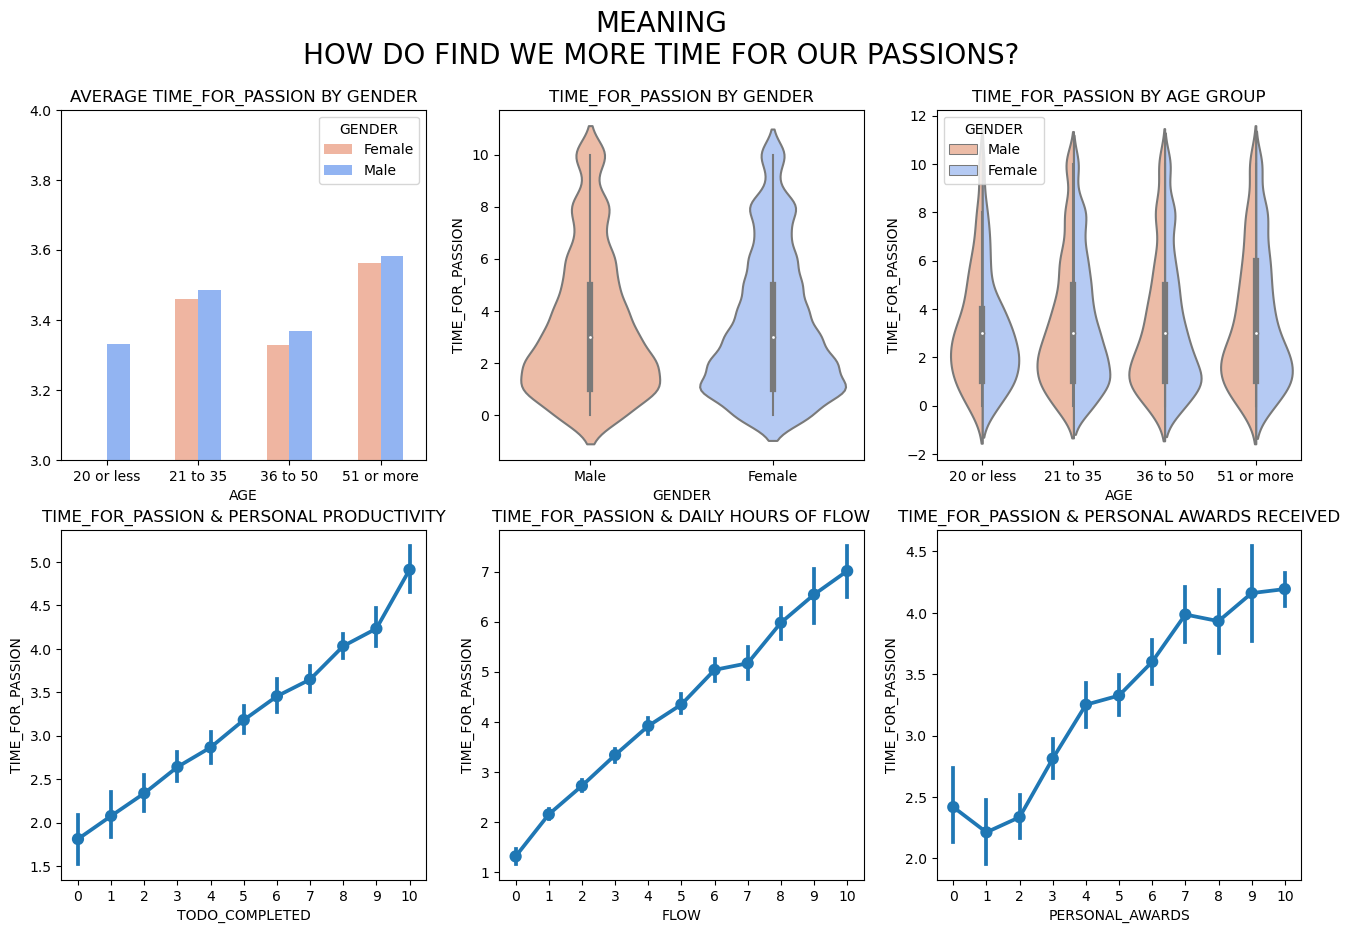

In [17]:
# PASSION
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('AVERAGE TIME_FOR_PASSION BY GENDER')
ax[0,1].set_title('TIME_FOR_PASSION BY GENDER')
ax[0,2].set_title('TIME_FOR_PASSION BY AGE GROUP')
ax[1,0].set_title('TIME_FOR_PASSION & PERSONAL PRODUCTIVITY')
ax[1,1].set_title('TIME_FOR_PASSION & DAILY HOURS OF FLOW')
ax[1,2].set_title('TIME_FOR_PASSION & PERSONAL AWARDS RECEIVED')

ax[0,0].set_ylim([3, 4])
df6.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,0]) 
ax[0,0].tick_params(axis='x', rotation=0)

sns.violinplot(x= 'GENDER',y='TIME_FOR_PASSION', palette='coolwarm_r', data=df, ax = ax[0,1])
sns.violinplot(x = 'AGE', y = 'TIME_FOR_PASSION', palette='coolwarm_r', hue = 'GENDER', data = df,
               order=['20 or less', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,2])
sns.pointplot(x = 'TODO_COMPLETED',  y = 'TIME_FOR_PASSION',  data=df, ax = ax[1,0])
sns.pointplot(x = 'FLOW',  y = 'TIME_FOR_PASSION',  data=df, ax = ax[1,1])
sns.pointplot(x = 'PERSONAL_AWARDS', y = 'TIME_FOR_PASSION',  data=df, ax = ax[1,2])

f.suptitle('MEANING\nHOW DO FIND WE MORE TIME FOR OUR PASSIONS?', fontsize=20)
plt.show()

### Observations

<ul style="list-style-type:square">    
    <li>Women have a specific proclivity to devote substantial time to pursue their hobbies, a pattern that is most noticeable during their formative and adult years. This discovery gives light on the complex interplay between age dynamics and the development of personal preferences among women, stressing a distinct and developing relationship.
Within this perspective, the study highlights three critical elements that are directly associated to women's capacity to devote time to their passions:
         <ol>
             <li><u>Daily Personal Productivity:</u>When it comes to allocating time for personal hobbies, the efficiency and efficacy of everyday activities emerge as critical concerns for women. Women who have high levels of daily personal productivity are more likely to incorporate their hobbies into their daily routines. This emphasizes the importance of effective time management and task efficiency in enabling women to prioritize and engage in activities that are matched with their particular interests.</li>
             <li><u>Daily Flow:</u>The concept of "flow," characterized by a state of deep concentration and heightened enjoyment during an activity, emerges as a particularly influential factor shaping women's ability to make time for their passions. Experiencing daily flow positively correlates with women's inclination to engage in personal interests, underlining the importance of intrinsic motivation and the joy derived from the activity itself in fostering a commitment to their passions.</li>
             <li><u>Daily Personal Productivity:</u>Women's dedication to making time for their hobbies is significantly influenced by recognition and awards. The study finds a strong link between women's personal honors and recognition and their attention to personal interests. This highlights the motivating influence of external validation, which serves as a spur for women to carve out time for activities that provide a sense of success and fulfillment.</li>
        </ol>
    </li>   
    <li>In essence, these findings spotlight the nuanced relationship between individual behaviors, psychological states, and external recognition, offering valuable insights to empower women in embracing and prioritizing their passions throughout various life stages. Recognizing and understanding these factors can inform strategies to enhance women's ability to seamlessly integrate their interests into their daily lives, fostering a profound sense of fulfillment and well-being.</li>
</ul>